In [1]:
import torch
import logging 
from utils.mnist_model import UNet
from utils.predict_function import predict_single
from utils.utils import preprocess_mnist, correlation, padding
from skimage import io
from utils.plot import paper_plot_direct
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### (1) 加载仿真模型和实验模型

In [2]:
# simulation model
model1_name = "./MNIST_model/MNIST_model_PSF.pt"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model1 = UNet(input_channels=1, output_channels=1).to(device)
state_dict = torch.load(model1_name, map_location=device)
model1.load_state_dict(state_dict['model_state_dict'])
model1.eval()
logging.info('Model1 loaded!')

### (2) 数据预处理   以及   单次实验数据重建   查看效果

重建图像耗时： 0.12575960159301758


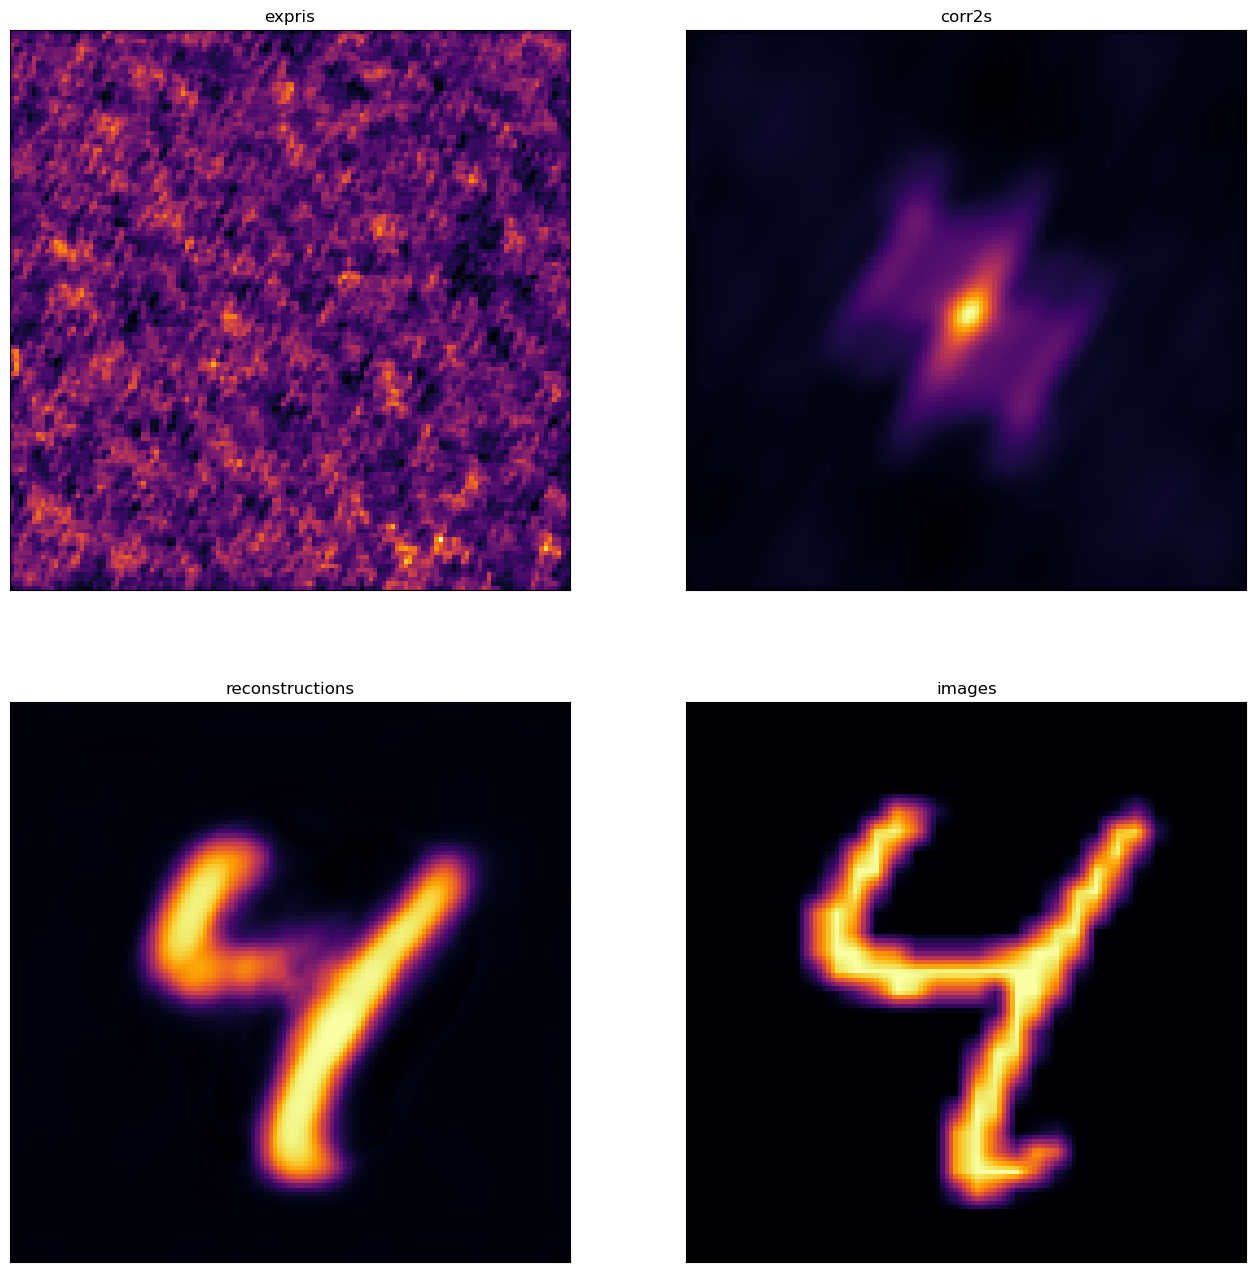

In [13]:
cut_size = 80  # choose a right cut_size
name = "7"

read_dir_speckle = "./data/speckle/"
read_dir_label = "./data/label/"
speckle_name = read_dir_speckle + name + ".bmp"
label_name = read_dir_label + "TestImage_" + name + ".bmp"
data_type = torch.float32

label_image = io.imread(label_name)  # load label
speckle_image = io.imread(speckle_name) # load speckle
label_image1, corr21, speckle_image1 = preprocess_mnist(label_image, speckle_image, cut_size)

image_pred1, _ = predict_single(model1, device, corr21, label_image1, speckle_image1, data_type)